# 1.Libraries & Data Load

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import seaborn as sns
sns.set_palette('Spectral', color_codes=True)
sns.set(font_scale=2)

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


In [2]:
#Load data
df = pd.read_csv('../IOD_P2/average-monthly-recruitment-resignation-rates-by-industry-and-occupational-group-quarterly/average-monthly-recruitment-resignation-rate-by-industry-level-3.csv')

In [3]:
#Data fist look
df.head()

,quarter,industry1,industry2,industry3,recruitment_rate,resignation_rate
0,1990-Q1,manufacturing,"food, beverages and tobacco","food, beverages and tobacco",3.6,3.2
1,1990-Q1,manufacturing,textile and wearing apparel,textile and wearing apparel,3.6,4.5
2,1990-Q1,manufacturing,paper products and publishing,paper products and publishing,3.9,3.5
3,1990-Q1,manufacturing,petroleum and chemical products,petroleum and chemical products,2.9,2.5
4,1990-Q1,manufacturing,rubber and plastic products,rubber and plastic products,5.2,5.3


In [4]:
#Data fist look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   quarter           3752 non-null   object 
 1   industry1         3752 non-null   object 
 2   industry2         3752 non-null   object 
 3   industry3         3752 non-null   object 
 4   recruitment_rate  3752 non-null   float64
 5   resignation_rate  3752 non-null   float64
dtypes: float64(2), object(4)
memory usage: 176.0+ KB


# 2.Data Pre-processing & EDA

In [5]:
#Transforming 'quarter' column
df['year'] = df['quarter'].str[:4].astype('float64')
df['quarter'] = df['quarter'].str[-1:].astype('float64')

In [6]:
#Reorder dataframe columns
df = df[['year','quarter','industry1','industry2','industry3','recruitment_rate','resignation_rate']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              3752 non-null   float64
 1   quarter           3752 non-null   float64
 2   industry1         3752 non-null   object 
 3   industry2         3752 non-null   object 
 4   industry3         3752 non-null   object 
 5   recruitment_rate  3752 non-null   float64
 6   resignation_rate  3752 non-null   float64
dtypes: float64(4), object(3)
memory usage: 205.3+ KB


In [8]:
df.describe()

,year,quarter,recruitment_rate,resignation_rate
count,3752.000000,3752.000000,3752.000000,3752.000000
mean,2006.384861,2.487207,2.791125,2.285208
std,8.832097,1.114288,1.362237,1.248211
min,1990.000000,1.000000,0.100000,0.300000
25%,2000.000000,1.000000,1.800000,1.400000
50%,2007.000000,2.000000,2.500000,2.000000
75%,2014.000000,3.000000,3.500000,2.800000
max,2021.000000,4.000000,11.400000,10.900000


In [9]:
len(df['industry3'].unique())

56

In [10]:
#Observations from each industry1
df.groupby(['industry1'])['industry3'].count()

industry1
construction      127
manufacturing    1185
others            127
services         2313
Name: industry3, dtype: int64

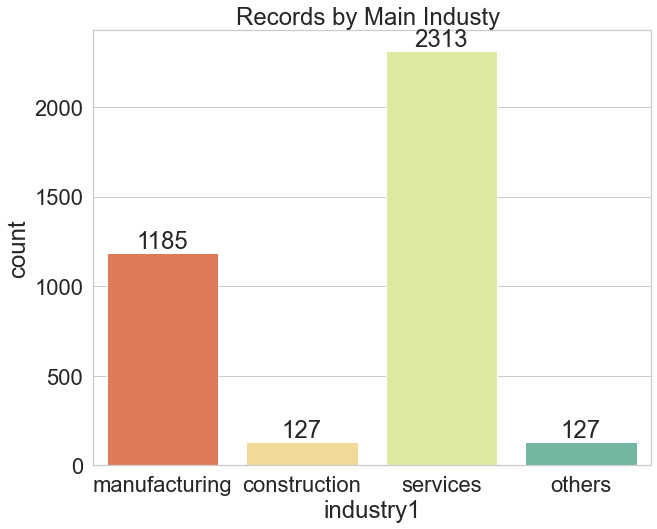

In [11]:
plt.figure(figsize = (10,8))
sns.set_style('whitegrid')
chart = sns.countplot(x='industry1', data=df, palette='Spectral')
chart.bar_label(chart.containers[0])
plt.title('Records by Main Industy ');

In [12]:
#No. of types in industry3
len(df['industry3'].unique())

56

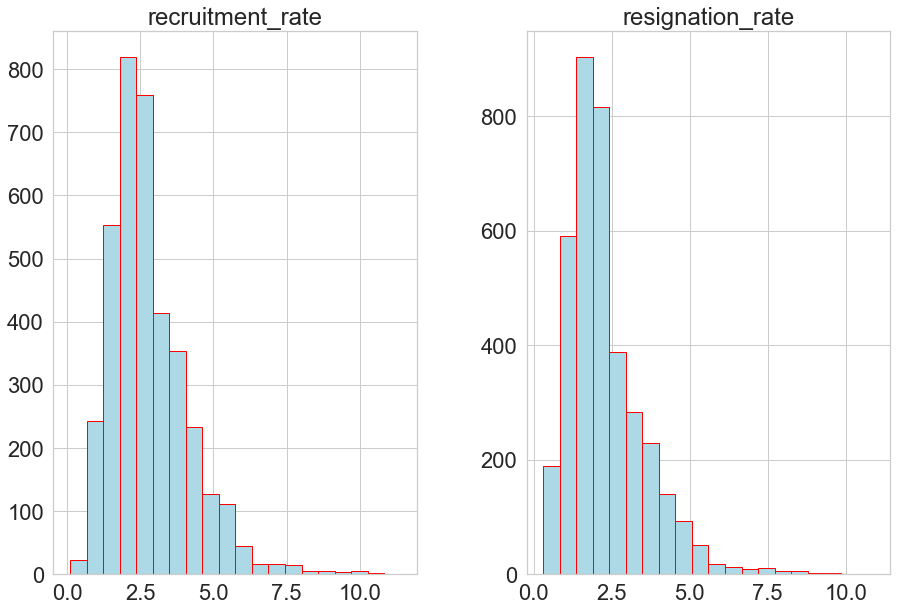

In [13]:
#Explore distribution of recruitment & resignation rates
sns.set_style('whitegrid')
df[['recruitment_rate','resignation_rate']].hist(bins=20, figsize=(15,10),color='lightblue', edgecolor = 'red');

In [14]:
#Find outliers
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    outliers = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return outliers

outl=find_outliers(df)
outl = outl.count().sort_values(ascending=False).to_frame().T

outl

C:\Users\chani\AppData\Local\Temp\ipykernel_12624\978215336.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]


,resignation_rate,recruitment_rate,year,quarter,industry1,industry2,industry3
0,155,88,0,0,0,0,0


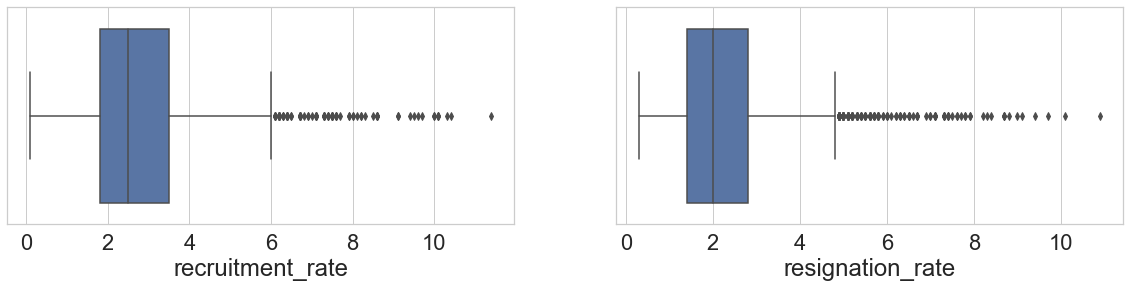

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['recruitment_rate'], data=df);
plt.xlabel('recruitment_rate');
plt.subplot(1,2,2)
sns.boxplot(x=df['resignation_rate'], data=df);
plt.xlabel('resignation_rate'); 

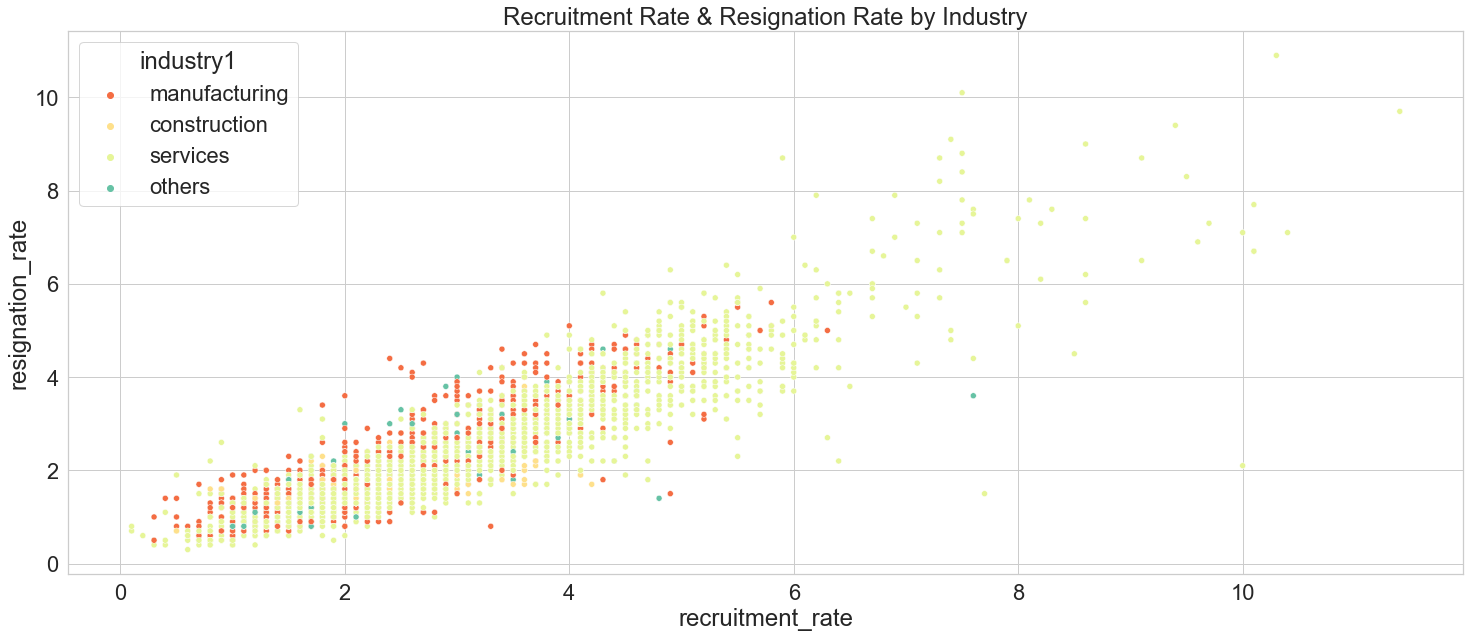

In [16]:
#Explore recruitment & resgination rate by industry1
sns.set_style('whitegrid')
plt.figure(figsize=(25,10))
sns.scatterplot(x=df['recruitment_rate'], y=df['resignation_rate'], hue=df['industry1'],palette='Spectral')
plt.title('Recruitment Rate & Resignation Rate by Industry');

<Figure size 1800x1440 with 0 Axes>

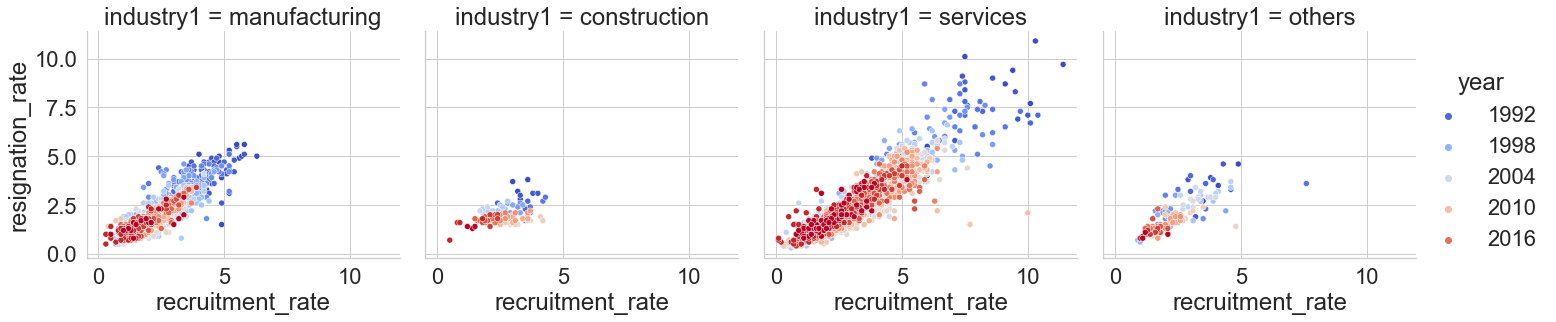

In [17]:
#Explore recruitment & resgination rate by industry1 & year
sns.set_style('whitegrid')
plt.figure(figsize=(25,20))
sns.relplot(x=df['recruitment_rate'], y=df['resignation_rate'], hue="year",
            col="industry1",data=df,palette='coolwarm');

In [18]:
#Drop records prior to Y2000 as trends seems to change; rate after Y2000 tends to be a lot lower than the 90's
df = df[df['year']>=2000].reset_index(drop=True)
df.head()

,year,quarter,industry1,industry2,industry3,recruitment_rate,resignation_rate
0,2000.0,1.0,manufacturing,"food, beverages and tobacco","food, beverages and tobacco",3.4,3.5
1,2000.0,1.0,manufacturing,paper products and printing,paper products and printing,3.5,2.8
2,2000.0,1.0,manufacturing,"petroleum, chemical and pharmaceutical products","petroleum, chemical and pharmaceutical products",2.0,1.2
3,2000.0,1.0,manufacturing,rubber and plastic products,rubber and plastic products,3.9,2.6
4,2000.0,1.0,manufacturing,fabricated metal products,fabricated metal products,2.8,2.8


In [19]:
df.describe()

,year,quarter,recruitment_rate,resignation_rate
count,2832.000000,2832.000000,2832.000000,2832.000000
mean,2010.245763,2.483051,2.590819,2.042867
std,6.313514,1.113037,1.204381,1.026566
min,2000.000000,1.000000,0.100000,0.300000
25%,2005.000000,1.000000,1.700000,1.300000
50%,2010.000000,2.000000,2.400000,1.800000
75%,2016.000000,3.000000,3.200000,2.500000
max,2021.000000,4.000000,10.000000,6.600000


In [20]:
#Check correlation
df.corr()

,year,quarter,recruitment_rate,resignation_rate
year,1.000000,-0.025948,-0.168764,-0.144342
quarter,-0.025948,1.000000,-0.051025,-0.119653
recruitment_rate,-0.168764,-0.051025,1.000000,0.891389
resignation_rate,-0.144342,-0.119653,0.891389,1.000000


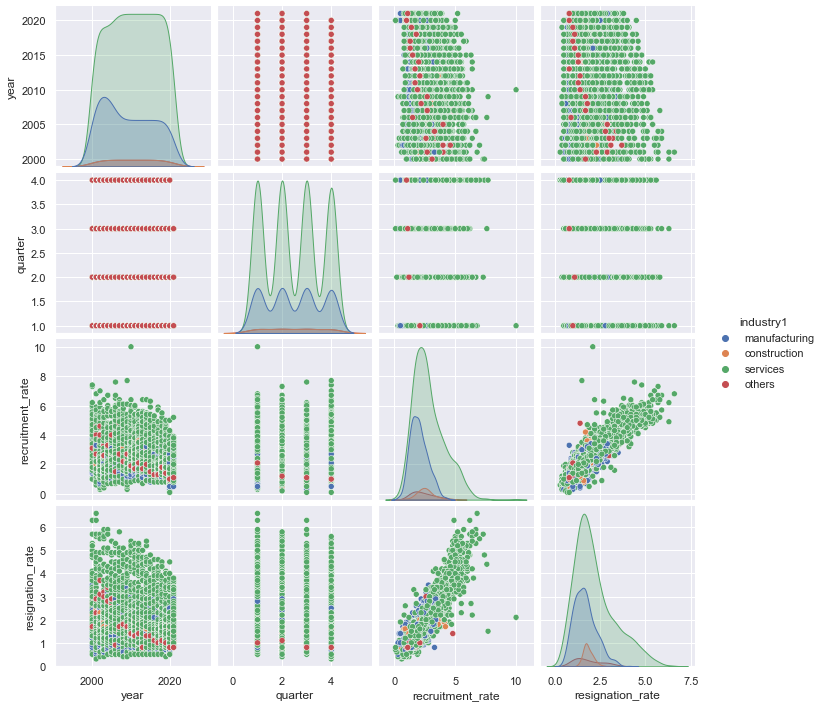

In [21]:
#Check correlation by industry1
sns.set_style('whitegrid')
sns.set(font_scale=1)
sns.pairplot(df, hue = 'industry1');

# 3.1 Model Creation: K-Means

In [22]:
X = df.loc[:, ['recruitment_rate', 'resignation_rate']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

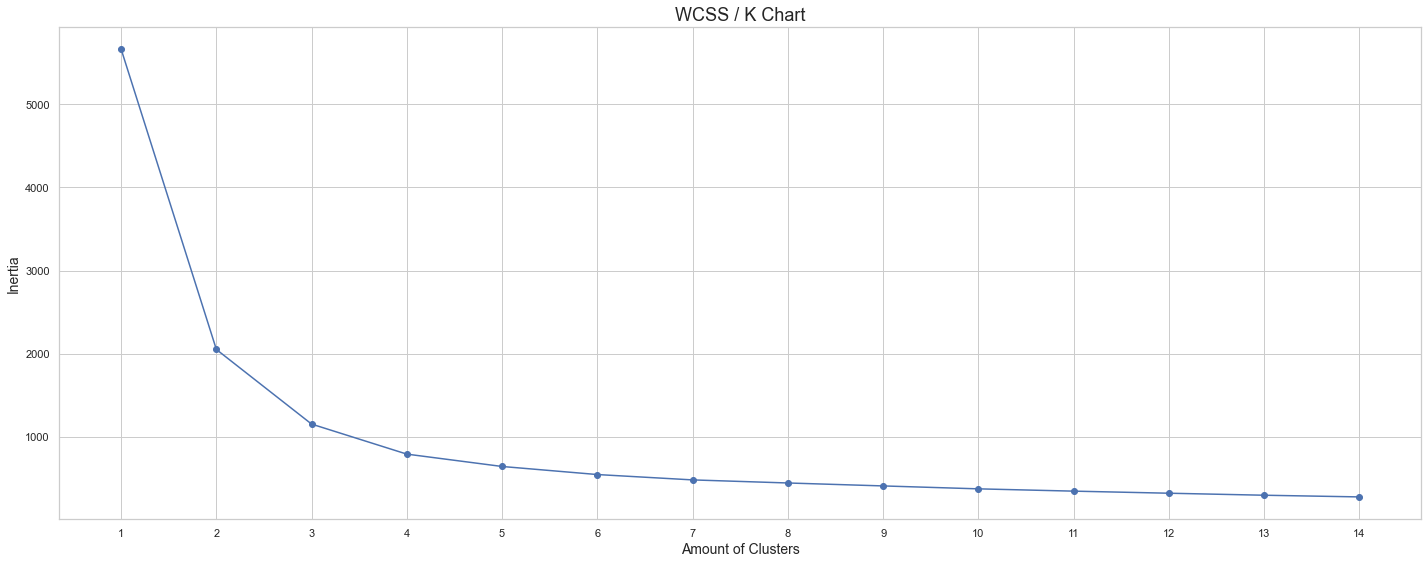

In [23]:
sns.set_style('whitegrid')
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_sc)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,15))
plt.tight_layout()
plt.show()

In [24]:
km = KMeans(n_clusters = 3, random_state= 42)
km.fit(X_sc)

KMeans(n_clusters=3, random_state=42)

In [25]:
km.cluster_centers_

array([[-0.74602265, -0.7110564 ],
       [ 1.90078404,  1.97417358],
       [ 0.31782818,  0.24389044]])

In [26]:
## Create a dataframe for cluster_centers (centroids)

centroids = pd.DataFrame(
            sc.inverse_transform(km.cluster_centers_),
            columns = ["recruitment_rate","resignation_rate"]
)

In [27]:
centroids

,recruitment_rate,resignation_rate
0,1.692482,1.313050
1,4.879683,4.069129
2,2.973538,2.293193


C:\Users\chani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


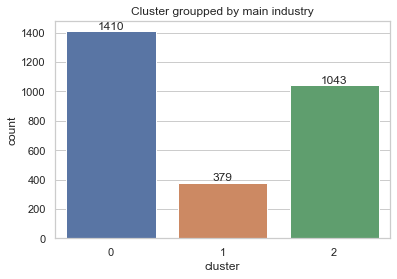

In [28]:
sns.set(font_scale=1)
sns.set_style('whitegrid')
df['cluster'] = km.labels_
df.groupby(['industry1'])['cluster'].value_counts()
chart = sns.countplot('cluster',data=df)
chart.bar_label(chart.containers[0])
plt.title('Cluster groupped by main industry');

<Figure size 504x504 with 0 Axes>

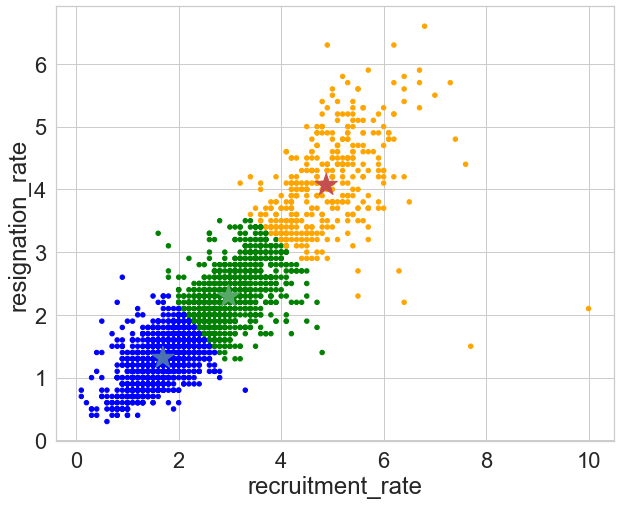

In [29]:

sns.set(font_scale=2)
sns.set_style('whitegrid')
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["blue", "orange", "green"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter",
    x="recruitment_rate", y="resignation_rate",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="recruitment_rate", y="resignation_rate",
    marker="*", c=["b", "r", "g"], s=550,
    ax=ax
);

# 3.2 Model Creation: KNN

## 3.2.1 Model Creation: KNN - without one-hot encoding

In [30]:
df['industry1'].unique()

array(['manufacturing', 'construction', 'services', 'others'],
      dtype=object)

In [31]:
#Transform categorical features to scale 0 to 3
cat = {'manufacturing':0 ,'construction':1 , 'services':2, 'others':3}
df['ind1'] = df['industry1'].map(cat) 

In [32]:
#Define X,y and split data into Train & Test
X = df.loc[:, ['recruitment_rate', 'ind1']]
y=df['resignation_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [33]:
#Scale X
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

In [34]:
#Find optimal n_neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_sc,y_train)
model.best_params_

{'n_neighbors': 9}

In [35]:
#Instantiate knn with n_neighbors = 9
knn = KNeighborsRegressor(n_neighbors=9)

# Fit 
knn.fit(X_train_sc,y_train)

# Score on training and testing sets.
print(f'Training Score: {round(knn.score(X_train_sc, y_train),4)}')
print(f'Testing Score: {round(knn.score(X_test_sc, y_test),4)}')

#Predict
knn_pred = knn.predict(X_test_sc)

print('KNN RMSE : ', np.sqrt(mean_squared_error(y_test,knn_pred)))
print('y test mean: ', y_test.mean())

Training Score: 0.8229
Testing Score: 0.8113
KNN RMSE :  0.45910633512451826
y test mean:  2.0613756613756613


In [36]:
#remove the mapping for base model creation; will let one-hot encoding handles later
df.drop('ind1', axis=1, inplace=True)

## 3.2.2 Model Creation: KNN - with one-hot encoding

In [37]:
#Create Dummies to convert nominal features into numerical values
col = list(df.select_dtypes(include=['object']).columns)
df = pd.get_dummies(df,columns = col)

In [38]:
#Define X,y and split data into Train & Test
predictor_columns = [c for c in df.columns if (c != 'resignation_rate') and (c != 'year')]
X = df[predictor_columns]
y = df['resignation_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [39]:
#Scale X
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

In [40]:
#Instantiate knn with n_neighbors=9
knn = KNeighborsRegressor(n_neighbors=9)

# Fit 
knn.fit(X_train_sc,y_train)

# Score on training and testing sets.
print(f'Training Score: {round(knn.score(X_train_sc, y_train),4)}')
print(f'Testing Score: {round(knn.score(X_test_sc, y_test),4)}')

#Predict
knn_pred = knn.predict(X_test_sc)

print('KNN RMSE : ', np.sqrt(mean_squared_error(y_test,knn_pred)))
print('y test mean: ', y_test.mean())

Training Score: 0.9372
Testing Score: 0.9039
KNN RMSE :  0.32764364842687793
y test mean:  2.0613756613756613


## 3.2.2 Model Creation: KNN - without one-hot encoding

In [41]:
#Instantiate pca & fit to X
pca = PCA(random_state=42)
pca.fit(X_train_sc)

PCA(random_state=42)

In [42]:
#Use pca to transform X_train & X_test
Z_train = pca.transform(X_train_sc)
Z_test = pca.transform(X_test_sc)

In [43]:
#Get explained variance ratio for the components
var_exp = pca.explained_variance_ratio_
len(var_exp)

88

In [44]:
print(f'Explained variance (first 20 components):{np.round(var_exp[:20],3)}')

print('')


Explained variance (first 20 components):[0.055 0.041 0.036 0.035 0.032 0.024 0.024 0.024 0.024 0.024 0.024 0.023
 0.023 0.023 0.023 0.023 0.023 0.023 0.023 0.023]



In [45]:
# Generate the cumulative explained variance.
cum_var_exp = np.cumsum (var_exp)
print(f'Cumulative explained variance (first 50 components): {np.round(cum_var_exp[:50],3)}')

Cumulative explained variance (first 50 components): [0.055 0.097 0.132 0.168 0.2   0.224 0.248 0.272 0.296 0.319 0.343 0.366
 0.39  0.413 0.436 0.46  0.483 0.506 0.529 0.552 0.575 0.598 0.621 0.644
 0.667 0.69  0.713 0.73  0.744 0.757 0.768 0.78  0.792 0.804 0.815 0.827
 0.839 0.85  0.862 0.874 0.885 0.897 0.908 0.92  0.931 0.943 0.954 0.966
 0.977 0.988]


In [46]:
# Instantiate PCA with 30 components.
pca =PCA(n_components= 30, random_state= 42)

# Fit PCA to training data.
pca.fit(X_train_sc)

# Instantiate KNN
knn = KNeighborsRegressor()
Zknn_train = pca.transform(X_train_sc)
Zknn_test = pca.transform(X_test_sc)

# Fit on Z_train.
knn.fit(Zknn_train,y_train)

# Score on training and testing sets.
print(f'Training Score: {round(knn.score(Zknn_train, y_train),4)}')
print(f'Testing Score: {round(knn.score(Zknn_test, y_test),4)}')

#Predict
knn_pred = knn.predict(Zknn_test)

print('KNN RMSE : ', np.sqrt(mean_squared_error(y_test,knn_pred)))
print('y test mean: ', y_test.mean())

Training Score: 0.9535
Testing Score: 0.9194
KNN RMSE :  0.3001269572634062
y test mean:  2.0613756613756613
